#Bangaluru House Price - Kaggle dataset

## **Dataset:** https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [1]:
#upload kaggle.json
from google.colab import files
files.upload()
print('Uploaded')

Saving kaggle.json to kaggle.json
Uploaded


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle datasets download -d amitabhajoy/bengaluru-house-price-data

  0% 0.00/195k [00:00<?, ?B/s]
100% 195k/195k [00:00<00:00, 78.5MB/s]


In [4]:
!unzip /content/bengaluru-house-price-data.zip -d kaggle

Archive:  /content/bengaluru-house-price-data.zip
  inflating: kaggle/Bengaluru_House_Data.csv  


##Start of Code


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/kaggle/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
catg = ['area_type', 'location', 'size', 'society', 'bath', 'balcony']

In [5]:
for obj in catg:
  print("{} sets {}".format(obj,set(df[obj])))

area_type sets {'Plot  Area', 'Built-up  Area', 'Carpet  Area', 'Super built-up  Area'}
location sets {nan, 'Hal old airport road', 'Udayagiri', 'Marenahalli', 'Ramanagara Channapatna', 'Jigani', 'Jyothi Nagar', 'Medahalli', 'Veerannapalya', 'Binnamangala', 'Kannamangala', 'Nelamangala', 'Garudachar Palya', 'Narayanappa Layout', '2nd Block Hbr Layout', 'Venkatadri Layout', 'Parappana Agrahara', 'Kamdhenu Nagar', 'Sarjapur  Road', 'Kalkere', 'Nagadevanahalli', 'Gowdanapalya', 'Kumarapalli', 'Dodda Banaswadi', 'Iggalur', 'Langford Town', 'Sanjay nagar', 'Keshava Nagar', 'V.V Puram', 'Weavers Colony', 'Sathanur', 'Vijayanagar', 'St Thomas Town', '1 Giri Nagar', 'Nandi Hills', 'Wilson Garden', 'white field,kadugodi', 'Someshwara Layout', '4th Block Koramangala', 'Anekal - Hosur Road', 'Chikka Tirupathi', 'Langford Gardens', 'Jalahalli East', 'Old Madras Road', 'Venkatapura', 'Hennur Gardens', 'Raja Rajeshwari Nagara', 'Virupakshapura', 'Begur', 'Chikkaballapur', 'Bhoganhalli', 'Vijayabank 

In [6]:
bath_mean = int(df['bath'].mean())
bath_mean

2

In [7]:
int(df['balcony'].mean())

1

In [8]:
set(df['size'])

{'1 BHK',
 '1 Bedroom',
 '1 RK',
 '10 BHK',
 '10 Bedroom',
 '11 BHK',
 '11 Bedroom',
 '12 Bedroom',
 '13 BHK',
 '14 BHK',
 '16 BHK',
 '18 Bedroom',
 '19 BHK',
 '2 BHK',
 '2 Bedroom',
 '27 BHK',
 '3 BHK',
 '3 Bedroom',
 '4 BHK',
 '4 Bedroom',
 '43 Bedroom',
 '5 BHK',
 '5 Bedroom',
 '6 BHK',
 '6 Bedroom',
 '7 BHK',
 '7 Bedroom',
 '8 BHK',
 '8 Bedroom',
 '9 BHK',
 '9 Bedroom',
 nan}

In [9]:
df['location'].fillna(value= 'Std', inplace = True)
df['location'] = df['location'].apply(lambda x : x.strip())

In [10]:
location_cnt = df['location'].value_counts()
location_cnt

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [11]:
location_cnt[location_cnt<=2]

Jayamahal Extension                   2
MLA Layout                            2
Infantry Road                         2
GD Layout                             2
Palace Road                           2
                                     ..
1Channasandra                         1
Hosahalli                             1
Vijayabank bank layout                1
near Ramanashree California resort    1
Abshot Layout                         1
Name: location, Length: 646, dtype: int64

In [12]:
location_cnt_2 = location_cnt[location_cnt<=2]

In [13]:
df['location'] = df['location'].apply(lambda x :'other' if x in location_cnt_2 else x)

In [14]:
df['location'].value_counts()

other              818
Whitefield         541
Sarjapur  Road     399
Electronic City    304
Kanakpura Road     273
                  ... 
Nanjappa Layout      3
Gattahalli           3
Tirumanahalli        3
Brindavan Nagar      3
Ayappa Nagar         3
Name: location, Length: 650, dtype: int64

In [15]:
df['bath'].fillna(value= bath_mean, inplace = True)
set(df.bath)

{1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 18.0,
 27.0,
 40.0}

In [16]:
df['balcony'].fillna(value= 0, inplace = True)
set(df.balcony)

{0.0, 1.0, 2.0, 3.0}

In [17]:
df['size'].fillna(value= '1 BHK', inplace = True)

In [18]:
set(df['size'])

{'1 BHK',
 '1 Bedroom',
 '1 RK',
 '10 BHK',
 '10 Bedroom',
 '11 BHK',
 '11 Bedroom',
 '12 Bedroom',
 '13 BHK',
 '14 BHK',
 '16 BHK',
 '18 Bedroom',
 '19 BHK',
 '2 BHK',
 '2 Bedroom',
 '27 BHK',
 '3 BHK',
 '3 Bedroom',
 '4 BHK',
 '4 Bedroom',
 '43 Bedroom',
 '5 BHK',
 '5 Bedroom',
 '6 BHK',
 '6 Bedroom',
 '7 BHK',
 '7 Bedroom',
 '8 BHK',
 '8 Bedroom',
 '9 BHK',
 '9 Bedroom'}

In [19]:
df[['size', 'suff']] = df['size'].str.split(' ', 1, expand=True)

In [20]:
df['size'] = df['size'].astype(int)
df['bath'] = df['bath'].astype(int)
df['balcony'] = df['balcony'].astype(int)

In [21]:
set(df['size'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 27, 43}

In [22]:
df[catg][:5]

,area_type,location,size,society,bath,balcony
0,Super built-up Area,Electronic City Phase II,2,Coomee,2,1
1,Plot Area,Chikka Tirupathi,4,Theanmp,5,3
2,Built-up Area,Uttarahalli,3,NaN,2,3
3,Super built-up Area,Lingadheeranahalli,3,Soiewre,3,1
4,Super built-up Area,Kothanur,2,NaN,2,1


In [23]:
df['society'].fillna(value= "Std", inplace = True)
set(df.society)

{'Puachal',
 'Vaodssh',
 'ViortCo',
 'Malowr ',
 'Sonosty',
 'Pao 3ow',
 'SNnia E',
 'Siayayo',
 'HoDewy ',
 'VisicCl',
 'PaantPl',
 'R ra  R',
 'HRnyaAn',
 'Pridei ',
 'EGdiaAr',
 'Lecco C',
 'NaaveEn',
 'Srrnasa',
 'Amconi ',
 'Scenth ',
 'Golmsoy',
 'MJarlPe',
 'Veales ',
 'AltesEs',
 'Chsilut',
 'Shestut',
 'Ronty C',
 'Apinaa ',
 'Leton A',
 'Naashi ',
 'Rakulai',
 'Eltert ',
 'Wharl P',
 'Stide B',
 'Bamita ',
 'Soarkig',
 'T ZedZe',
 'Sravehi',
 'Samesan',
 'Sotus L',
 'KencyRe',
 'BMineis',
 'Naasyak',
 'PrawnRa',
 'Adevo S',
 'SViseun',
 'Vanami ',
 'S mesci',
 'Prmes H',
 'Prclee ',
 'Puodsm ',
 'MDncyhi',
 'Upoutks',
 'NDionas',
 'JRaderc',
 'Prncyrn',
 'Pronege',
 'Raaden ',
 'Amsomun',
 'Bebalrk',
 'Maentr ',
 'Vaw 1il',
 'Palanla',
 'DSrry S',
 'Puceswn',
 'PuineSu',
 'Coa 3t ',
 'Mairer ',
 'GoityEt',
 'Laowsba',
 'Bemesrm',
 'Seityen',
 'RodenGa',
 'Anavi B',
 'SancyRe',
 'Jaensa ',
 'Jainaht',
 'SoechHa',
 'Eladero',
 'Suriaa ',
 'Laihai ',
 'Srdor S',
 'Sringlv',
 'Ar

In [24]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'suff'],
      dtype='object')

In [227]:
for col in df1.columns:
  print('{} has NA ? {}'.format(col,df[col].isna().values.any()))

area_type has NA ? False
location has NA ? False
size has NA ? False
society has NA ? False
total_sqft has NA ? False
bath has NA ? False
balcony has NA ? False
price has NA ? False


In [26]:
df1 = df.loc[:,['area_type', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price']]

In [27]:
df1.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,Coomee,1056,2,1,39.07
1,Plot Area,Chikka Tirupathi,4,Theanmp,2600,5,3,120.00
2,Built-up Area,Uttarahalli,3,Std,1440,2,3,62.00
3,Super built-up Area,Lingadheeranahalli,3,Soiewre,1521,3,1,95.00
4,Super built-up Area,Kothanur,2,Std,1200,2,1,51.00


In [228]:
df1['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [29]:
# converting total_sqft  into a float using funtion
def convertRange(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except :
        return None

In [30]:
df1['total_sqft'] = df1['total_sqft'].apply(convertRange)

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [32]:
le_ar_type =LabelEncoder()
le_loc =LabelEncoder()
le_society =LabelEncoder()

In [33]:
df1['area_type'] = le_ar_type.fit_transform(df1['area_type'])
df1['location'] = le_loc.fit_transform(df1['location'])
df1['society'] = le_society.fit_transform(df1['society'])

In [34]:
enc_at = OneHotEncoder()
enc_loc = OneHotEncoder()
enc_soc = OneHotEncoder()

In [35]:
at_col = []
for i in set(df1.area_type):
  at_col.append(str(le_ar_type.inverse_transform([i])[0]).replace(' ','_'))
  #at_col.append(str(le_ar_type.inverse_transform([i])[0]).replace(' ','_'))

In [36]:
at_col

['Built-up__Area', 'Carpet__Area', 'Plot__Area', 'Super_built-up__Area']

In [37]:
#perform one-hot encoding on 'team' column 
pd.DataFrame(enc_at.fit_transform(df1[['area_type']]).toarray(),columns=at_col)

,Built-up__Area,Carpet__Area,Plot__Area,Super_built-up__Area
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
13315,1.0,0.0,0.0,0.0
13316,0.0,0.0,0.0,1.0
13317,1.0,0.0,0.0,0.0
13318,0.0,0.0,0.0,1.0


In [38]:
df1.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,3,217,2,464,1056.0,2,1,39.07
1,2,160,4,2440,2600.0,5,3,120.00
2,0,604,3,2351,1440.0,2,3,62.00
3,3,398,3,2186,1521.0,3,1,95.00
4,3,375,2,2351,1200.0,2,1,51.00


In [39]:
loc_col = []
for i in set(df1['location']):
  loc_col.append(str(le_loc.inverse_transform([i])[0]).replace(' ','_'))

In [40]:
len(loc_col)

650

In [41]:
#perform one-hot encoding on 'team' column 
pd.DataFrame(enc_loc.fit_transform(df1[['location']]).toarray(),columns=loc_col)

,1st_Block_HBR_Layout,1st_Block_HRBR_Layout,1st_Block_Jayanagar,1st_Block_Koramangala,1st_Phase_JP_Nagar,1st_Stage_Indira_Nagar,2nd_Block_Hrbr_Layout,2nd_Block_Jayanagar,2nd_Phase_JP_Nagar,2nd_Phase_Judicial_Layout,...,Wilson_Garden,Yelachenahalli,Yelahanka,Yelahanka_New_Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur_Industrial_Suburb,other,tc.palya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_at = pd.DataFrame(enc_at.fit_transform(df1[['area_type']]).toarray(),columns=at_col)

In [43]:
#df_loc = pd.DataFrame(enc_loc.fit_transform(df1[['location']]).toarray(),columns=loc_col)

In [43]:
#drop_cols = ['area_type',	'location','society','Plot__Area', 'other']
drop_cols = ['area_type',	'location','society','Plot__Area']

In [44]:
#df_m =pd.merge(pd.merge(  df1,df_at,left_index=True,right_index=True)  ,df_loc,left_index=True,right_index=True).drop(columns=drop_cols)
df_m =pd.merge(  df1,df_at,left_index=True,right_index=True).drop(columns=drop_cols)

In [46]:
df_m.head()

,size,total_sqft,bath,balcony,price,Built-up__Area,Carpet__Area,Super_built-up__Area
0,2,1056.0,2,1,39.07,0.0,0.0,1.0
1,4,2600.0,5,3,120.00,0.0,0.0,0.0
2,3,1440.0,2,3,62.00,1.0,0.0,0.0
3,3,1521.0,3,1,95.00,0.0,0.0,1.0
4,2,1200.0,2,1,51.00,0.0,0.0,1.0


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

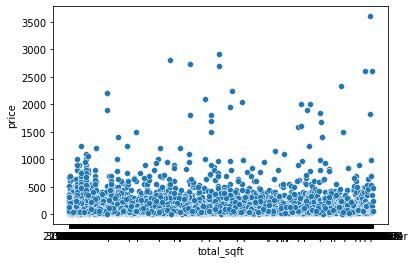

In [34]:
sns.scatterplot(x = 'total_sqft',y='price',data=df1 )

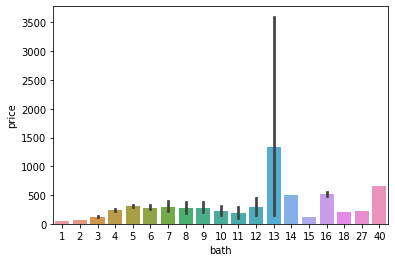

In [33]:
sns.barplot(x='bath',y='price',data=df1)


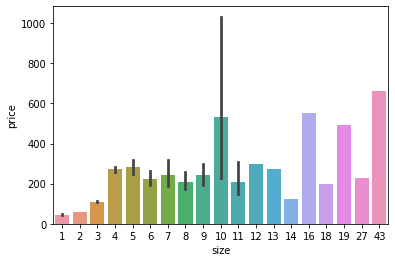

In [32]:
sns.barplot(x='size',y='price',data=df1)

In [35]:
df1.corr()

,area_type,location,size,society,bath,balcony,price
area_type,1.000000,0.033177,-0.121769,-0.128632,-0.101768,0.098609,-0.057359
location,0.033177,1.000000,-0.008418,-0.049399,0.003618,0.002593,0.011406
size,-0.121769,-0.008418,1.000000,0.133643,0.895428,0.070203,0.397787
society,-0.128632,-0.049399,0.133643,1.000000,0.110369,-0.061492,0.047804
bath,-0.101768,0.003618,0.895428,0.110369,1.000000,0.075339,0.454449
balcony,0.098609,0.002593,0.070203,-0.061492,0.075339,1.000000,0.019648
price,-0.057359,0.011406,0.397787,0.047804,0.454449,0.019648,1.000000


In [229]:
df1.corr()['price']

area_type    -0.057359
location      0.038930
size          0.397787
society       0.047804
total_sqft    0.575559
bath          0.454449
balcony       0.019648
price         1.000000
Name: price, dtype: float64

##Model selection and Model Training

In [209]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import r2_score,accuracy_score
from sklearn.compose import make_column_transformer

In [214]:
df1.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,3,217,2,464,1056.0,2,1,39.07
1,2,160,4,2440,2600.0,5,3,120.00
2,0,604,3,2351,1440.0,2,3,62.00
3,3,398,3,2186,1521.0,3,1,95.00
4,3,375,2,2351,1200.0,2,1,51.00


In [97]:
y_train.values.reshape(len(y_train.values),1)

array([[ 95. ],
       [115. ],
       [ 51.5],
       ...,
       [200. ],
       [ 74. ],
       [ 60. ]])

In [136]:
sc = StandardScaler()
sc_o = StandardScaler()

In [137]:
X_train_s = sc.fit_transform(X_train)
#sc_o.fit_transform(y_train[:])

In [138]:
y_train_s = sc_o.fit_transform(y_train.values.reshape(len(y_train.values),1))

In [105]:
sc_o.inverse_transform([y_train_s[0]])

array([[95.]])

In [82]:
y_train[:]

9226      95.00
4972     115.00
10201     51.50
5495      68.80
10901     36.25
          ...  
13123     69.00
3264     146.00
9845     200.00
10799     74.00
2732      60.00
Name: price, Length: 10656, dtype: float64

In [139]:
X_test_s = sc.transform(X_test)

In [140]:
y_test_s = sc_o.transform(y_test.values.reshape(len(y_test.values),1))

In [58]:
#X_train.total_sqft = sc.fit_transform(X_train.loc[:,['total_sqft']].astype(float))
#X_test.total_sqft = sc.transform(X_test.loc[:,['total_sqft']].astype(float))

array([[-0.46703803],
       [ 0.029332  ],
       [-0.25315501],
       [-0.32041382],
       [-0.11863738]])

In [141]:
X_train.head()

,size,total_sqft,bath,balcony,Built-up__Area,Carpet__Area,Super_built-up__Area
9226,3,1600.0,3,2,0.0,0.0,1.0
4972,7,5.0,7,3,1.0,0.0,0.0
10201,2,1263.0,2,1,0.0,0.0,1.0
5495,2,1314.0,2,2,0.0,0.0,1.0
10901,2,1110.0,2,2,0.0,0.0,1.0


In [151]:
y_train_s

array([[-0.11863738],
       [ 0.01588024],
       [-0.41121321],
       ...,
       [ 0.58758014],
       [-0.25988089],
       [-0.35404322]])

In [143]:
X_train_s[:5]

array([[ 0.15292233,  0.0333055 ,  0.22997779,  0.56046635, -0.47371445,
        -0.07954446,  0.71683429],
       [ 3.22607721, -1.31743012,  3.18879861,  1.71098253,  2.11097636,
        -0.07954446, -1.39502255],
       [-0.61536639, -0.25208504, -0.50972741, -0.59004982, -0.47371445,
        -0.07954446,  0.71683429],
       [-0.61536639, -0.20889537, -0.50972741,  0.56046635, -0.47371445,
        -0.07954446,  0.71683429],
       [-0.61536639, -0.38165403, -0.50972741,  0.56046635, -0.47371445,
        -0.07954446,  0.71683429]])

In [177]:
df_m.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'price', 'Built-up__Area',
       'Carpet__Area', 'Super_built-up__Area'],
      dtype='object')

In [230]:
# Separate Target Variable and Predictor Variables
TargetVariable=['price']
Predictors=['size', 'total_sqft', 'bath', 'balcony', 'Built-up__Area','Carpet__Area', 'Super_built-up__Area']

In [231]:
X=df_m[Predictors].values
y=df_m[TargetVariable].values

In [232]:
### Sandardization of data ###
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [233]:
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

In [234]:
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [235]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [236]:
print('The shape of X_train =',X_train.shape)
print('The shape of X_test = ',X_test.shape)
print('The shape of y_train = ',y_train.shape)
print('The shape of y_test = ',y_test.shape)

The shape of X_train = (9324, 7)
The shape of X_test =  (3996, 7)
The shape of y_train =  (9324, 1)
The shape of y_test =  (3996, 1)


In [237]:
X_train[:5]

array([[ 0.15314529,  0.35561049,  0.2324534 ,  0.56475221, -0.47095028,
        -0.08108312,  0.71788464],
       [ 0.15314529,  0.67942622,  0.2324534 ,  0.56475221, -0.47095028,
        -0.08108312,  0.71788464],
       [ 0.15314529,  0.25063282,  0.2324534 ,  0.56475221, -0.47095028,
        -0.08108312,  0.71788464],
       [-1.3904758 , -0.77491826, -1.26152937, -1.74950696, -0.47095028,
        -0.08108312,  0.71788464],
       [ 0.92495583,  2.47494811, -0.51453799, -1.74950696, -0.47095028,
        -0.08108312,  0.71788464]])

In [238]:
y_train[:5]

array([[ 0.58694149],
       [ 0.48624742],
       [-0.15148164],
       [-0.50055439],
       [ 2.28531468]])

In [239]:
X_test[:5]

array([[-0.61866525, -0.41153402, -0.51453799, -0.59237737,  2.1233664 ,
        -0.08108312, -1.39298146],
       [ 0.15314529,  0.10527912,  0.2324534 , -0.59237737, -0.47095028,
        -0.08108312,  0.71788464],
       [-0.61866525, -0.37115799, -0.51453799, -0.59237737,  2.1233664 ,
        -0.08108312, -1.39298146],
       [ 2.46857692, -0.29040594,  0.97944479,  0.56475221, -0.47095028,
        -0.08108312, -1.39298146],
       [ 0.92495583,  0.70203679,  0.2324534 , -0.59237737,  2.1233664 ,
        -0.08108312, -1.39298146]])

##Using ANN

In [ ]:
# Installing required libraries
!pip install tensorflow
!pip install keras

In [240]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

In [241]:
# create ANN model
model = Sequential()

In [242]:
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

In [243]:
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [244]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
467/467 [==============================] - 1s 2ms/step - loss: nan
Epoch 2/50
467/467 [==============================] - 1s 1ms/step - loss: nan
Epoch 3/50
467/467 [==============================] - 1s 2ms/step - loss: nan
Epoch 4/50
467/467 [==============================] - 1s 1ms/step - loss: nan
Epoch 5/50
467/467 [==============================] - 1s 1ms/step - loss: nan
Epoch 6/50
467/467 [==============================] - 1s 1ms/step - loss: nan
Epoch 7/50
467/467 [==============================] - 1s 2ms/step - loss: nan
Epoch 8/50
467/467 [==============================] - 1s 1ms/step - loss: nan
Epoch 9/50
467/467 [==============================] - 1s 1ms/step - loss: nan
Epoch 10/50
467/467 [==============================] - 1s 1ms/step - loss: nan
Epoch 11/50
467/467 [==============================] - 1s 1ms/step - loss: nan
Epoch 12/50
467/467 [==============================] - 1s 1ms/step - loss: nan
Epoch 13/50
467/467 [==============================] - 1s 2ms

KeyboardInterrupt: ignored

In [198]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression

In [ ]:
lr = LinearRegression(normalize=True)
pipe = make_pipeline(lr)
pipe.fit(X_train,y_train)
y_predict = pipe.predict(X_test)
print('R2 Score = ',r2_score(y_test,y_predict))